In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("browser_rankings_data.csv")
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [3]:
df.shape

(3066, 10)

In [4]:
df.Keyword.value_counts()

browser                         608
android browser                 608
privacy browser                 370
privacy browsers for android    370
best privacy browsers           370
fast browser                    370
ad free browser                 370
Name: Keyword, dtype: int64

In [5]:
df.Rank.value_counts()

1.0      562
2.0      490
3.0      214
6.0      213
4.0      170
        ... 
113.0      1
85.0       1
62.0       1
134.0      1
64.0       1
Name: Rank, Length: 119, dtype: int64

In [6]:
df['App ID'].value_counts()

com.duckduckgo.mobile.android    740
com.cloudmosa.puffinTV           608
com.brave.browser                370
com.vivaldi.browser              370
com.transsion.phoenix            370
com.opera.browser                304
net.fast.web.browser             152
com.android.chrome               152
Name: App ID, dtype: int64

In [7]:
from textblob import TextBlob

In [8]:
list_sentiment = []
for i in df["Short Description"]:
    score = TextBlob(i).sentiment[0]
    if (score > 0):
        list_sentiment.append('Positive')
    elif (score < 0):
        list_sentiment.append('Negative')
    else:
        list_sentiment.append('Neutral')

In [9]:
df["Sentiment"]=list_sentiment
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,Sentiment
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",Positive
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",Positive
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",Positive
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",Positive
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,Neutral


In [10]:
df.Sentiment.value_counts()

Positive    1718
Neutral     1348
Name: Sentiment, dtype: int64

In [11]:
# converting string to numerical.
df['Keyword']=df['Keyword'].astype('category').cat.codes
df['Country']=df['Country'].astype('category').cat.codes
df['Language']=df['Language'].astype('category').cat.codes
df['App ID']=df['App ID'].astype('category').cat.codes
df['Sentiment']=df['Sentiment'].astype('category').cat.codes

In [12]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,Sentiment
0,1,3,2.0,0,0,2020-12-16,7,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",1
1,2,3,3.0,0,0,2020-12-16,0,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",1
2,3,3,4.0,0,0,2020-12-16,4,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",1
3,3,3,4.0,0,0,2020-12-16,4,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",1
4,4,3,1.0,0,0,2020-12-16,2,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,0


In [18]:
# finding corr for each column seperately.
cor1 = df['Keyword'].corr(df['Rank'])
cor2 = df['Keyword'].corr(df['Country'])
cor3 = df['Keyword'].corr(df['App ID'])
cor4 = df['Keyword'].corr(df['Sentiment'])

In [19]:
print("cor1:",cor1)
print("cor2:",cor2)
print("cor3:",cor3)
print("cor4:",cor4)

cor1: 0.10376306847431481
cor2: nan
cor3: 0.06790578799934603
cor4: 0.03525691291734651


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

In [22]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saurav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def text_process(mess):
    '''
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return[word for word in nopunc.split()if word not in stopwords.words("english")]

In [25]:
df["Short Description"].apply(text_process)

0       [The, small, fastest, secure, Web, Browser, be...
1       [Fast, simple, secure, Google, Chrome, browser...
2       [Fast, safe, web, browser, free, VPN, Ad, bloc...
3       [Fast, safe, web, browser, free, VPN, Ad, bloc...
4       [Puffin, TV, Browser, One, App, Watch, All, Vi...
                              ...                        
3061    [Fast, safe, web, browser, free, VPN, Ad, bloc...
3062    [Puffin, TV, Browser, One, App, Watch, All, Vi...
3063    [Puffin, TV, Browser, One, App, Watch, All, Vi...
3064    [Puffin, TV, Browser, One, App, Watch, All, Vi...
3065    [Puffin, TV, Browser, One, App, Watch, All, Vi...
Name: Short Description, Length: 3066, dtype: object

In [26]:
from wordcloud import WordCloud

In [27]:
cloud = WordCloud().generate(str(df["Short Description"]))

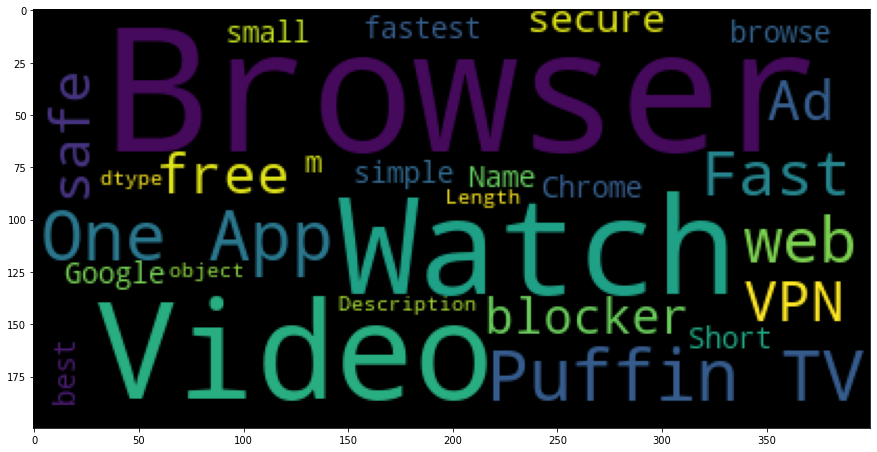

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,15))
plt.imshow(cloud)

In [33]:
from sklearn.feature_extraction.text  import CountVectorizer

In [34]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(df["Short Description"])
bow_transformer.vocabulary_

{'The': 17,
 'small': 51,
 'fastest': 35,
 'secure': 49,
 'Web': 21,
 'Browser': 5,
 'best': 25,
 'mobile': 38,
 'browser': 27,
 'fast': 34,
 'search': 48,
 'Google': 11,
 'Fast': 7,
 'simple': 50,
 'Chrome': 6,
 'Android': 2,
 'phones': 42,
 'tablets': 53,
 'safe': 47,
 'web': 56,
 'free': 36,
 'VPN': 18,
 'Ad': 0,
 'blocker': 26,
 'QRcode': 15,
 'reader': 46,
 'amp': 23,
 'personalized': 41,
 'news': 40,
 'Puffin': 14,
 'TV': 16,
 'One': 12,
 'App': 3,
 'Watch': 20,
 'All': 1,
 'Videos': 19,
 'Free': 9,
 'internet': 37,
 'Private': 13,
 'browsing': 28,
 'engine': 32,
 'popup': 43,
 'private': 44,
 'ad': 22,
 'sync': 52,
 'dark': 30,
 'mode': 39,
 'Browse': 4,
 'privately': 45,
 'anonymously': 24,
 'escape': 33,
 'trackers': 54,
 'Funny': 10,
 'video': 55,
 'Football': 8,
 'celebrity': 29,
 'datasaving': 31}

In [35]:
len(bow_transformer.vocabulary_)

57

In [37]:
mess_bow = bow_transformer.transform(df["Short Description"])

In [38]:
type(mess_bow)

scipy.sparse.csr.csr_matrix

In [39]:
mess_bow.shape

(3066, 57)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
TT  = TfidfTransformer()

In [42]:
TT.fit(mess_bow)

TfidfTransformer()

In [43]:
TT_mess = TT.transform(mess_bow)
TT_mess

<3066x57 sparse matrix of type '<class 'numpy.float64'>'
	with 29636 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [45]:
spam_nb = nb.fit(TT_mess,df.Keyword)
spam_nb

MultinomialNB()

In [46]:
pre_spam = nb.predict(TT_mess)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
cf = confusion_matrix(pre_spam,df.Keyword)
cf

array([[370,   0, 370,   0, 370, 370, 370],
       [  0, 608,   0, 608,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [49]:
acc = cf.diagonal().sum()/cf.sum()*100
acc

31.898238747553815

In [50]:
print(classification_report(pre_spam,df.Keyword))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33      1850
           1       1.00      0.50      0.67      1216
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.32      3066
   macro avg       0.29      0.10      0.14      3066
weighted avg       1.00      0.32      0.47      3066



c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le